# Exploratory Data Analysis
## Bivariate Data Analysis

In [1]:
# libraries
import os
import sys
import inspect
sys.path.append("../src")

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from shared import directories
from shared import filenames
from shared import variables
sys.path.append(directories.ANALYSIS_PATH)

import bivariate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Obtain training data

In [3]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.TRAIN_FILENAME),
                 encoding="Latin-1", low_memory=False)

### Decision Analysis

#### Demographic Variables vis-a-vis Decision

##### Decision by Gender
Based upon the contingency table, a significantly higher number of males made positive decisions than female participants. Though the association test shows a week correlation, I would expect to see a significant result in a chi-squared hypothesis test.

Contingency Table


decision_c,no,yes,All
gender,,,
female,1700,963,2663
male,1410,1288,2698
All,3110,2251,5361


Cramer's Association


,x,y,Cramer's V,Strength
0,gender,decision_c,0.081009,Very Weak Association


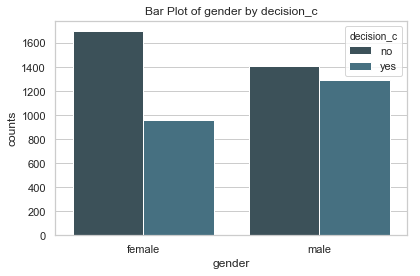

In [4]:
x = 'gender'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Contingency Table" + color.END)
d
print(color.BOLD + "Cramer's Association" + color.END)
i

##### Decision by Age
Both the visuals and the analysis of variance show no real relationship between age and decision.

Descriptive Statistics of Decision by Age


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
age,yes,2234.0,17,19.0,24.0,26.459714,26.0,29.0,55.0,-11.376264,127.419374
age,no,3069.0,41,18.0,24.0,26.347344,26.0,28.0,55.0,-8.536218,70.867018


Analysis of Variance of Decision by Age


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,age,decision_c,16.324966,67788.605074,1.0,5301.0,1.276596,0.258584,0.000241


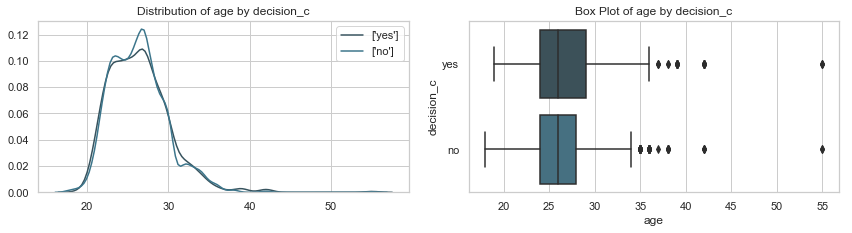

In [5]:
x = 'age'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Age" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Age" + color.END)
i

##### Decision by Age of Partner
Though the distributions look nearly identical suggesting little to no relationship between decision and the age of the partner.  The significance of the anova test could be attributed to the sample size. Eta squared indicates that just 0.2% of the variance in the decision was explained by the age of the partner.  No practical significance.

Descriptive Statistics of Decision by Age of Partner


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
age_o,yes,2216.0,35,18.0,24.0,26.177347,26.0,28.0,55.0,-7.831352,59.330080
age_o,no,3070.0,40,18.0,24.0,26.529642,26.0,29.0,55.0,-8.646562,72.763029


Analysis of Variance of Decision by Age of Partner


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,age_o,decision_c,159.732848,68356.105404,1.0,5284.0,12.34752,0.000445,0.002331


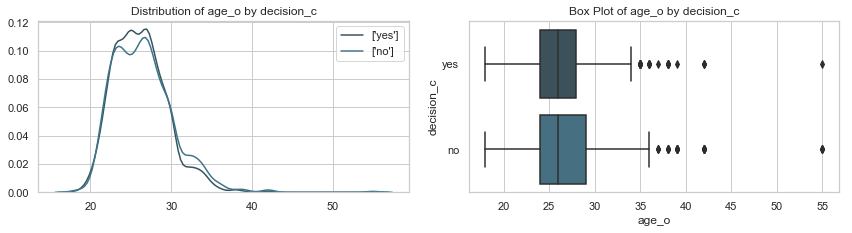

In [6]:
x = 'age_o'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Age of Partner" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Age of Partner" + color.END)
i

##### Decision by Difference in Age
Again, the distributions look almost identical. There is a slight difference indicated by the boxplots, however the anova test indicates that there was no practical difference in decisions by the difference in age.

Descriptive Statistics of Decision by Difference in Age


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
d_age,yes,2251.0,0,0.0,1.0,4.039982,3.0,5.0,37.0,0.0,-3.0
d_age,no,3110.0,0,0.0,1.0,4.311897,3.0,6.0,37.0,0.0,-3.0


Analysis of Variance of Decision by Difference in Age


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,d_age,decision_c,96.55083,115205.861406,1.0,5359.0,4.491229,0.034115,0.000837


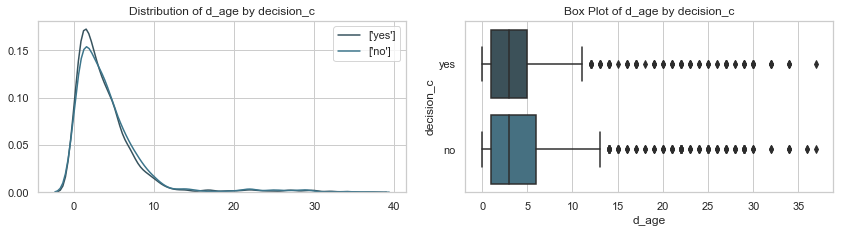

In [7]:
x = 'd_age'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Difference in Age" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Difference in Age" + color.END)
i

##### Decision by Race
Though the analysis of variance test shows a weak association, their was a difference in the proportion of yes decisions across the races.  For instance, the proportion of yes decisions amongst caucasians was significantly higher than that of black participants. This may be a consequence of the numbers of participants by race, especially if same race was a factor. There were more caucasians than the other races combined. 

Descriptive Statistics of Decision by Race


decision_c,no,yes,All
race,,,
asian,689,571,1260
black,130,133,263
caucasian,1840,1193,3033
latino,254,175,429
other,171,168,339
All,3084,2240,5324


Analysis of Variance of Decision by Race


,x,y,Cramer's V,Strength
0,race,decision_c,0.041804,Very Weak Association


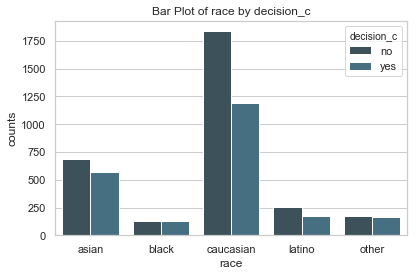

In [8]:
x = 'race'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Race" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Race" + color.END)
i

##### Decision by Race of the Partner
Again we see a weak association between decision and race of the partner, yet stronger than the association between race and decision.

Descriptive Statistics of Decision by Race of Partner


decision_c,no,yes,All
race_o,,,
asian,821,429,1250
black,181,109,290
caucasian,1657,1347,3004
latino,224,196,420
other,199,142,341
All,3082,2223,5305


Analysis of Variance of Decision by Race of Partner


,x,y,Cramer's V,Strength
0,race_o,decision_c,0.135017,Very Weak Association


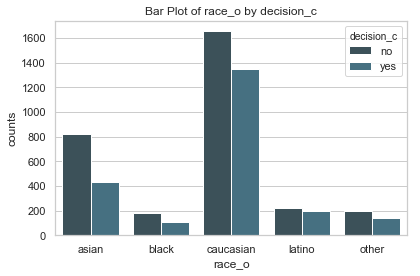

In [9]:
x = 'race_o'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Race of Partner" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Race of Partner" + color.END)
i

##### Decision by Same Race Indicator
There appears to be no significant difference between the proportion of yes decisions based upon same race.

Descriptive Statistics of Decision by Same Race


decision_c,no,yes,All
samerace_c,,,
no,1916,1325,3241
yes,1194,926,2120
All,3110,2251,5361


Analysis of Variance of Decision by Same Race


,x,y,Cramer's V,Strength
0,samerace_c,decision_c,0.006325,Very Weak Association


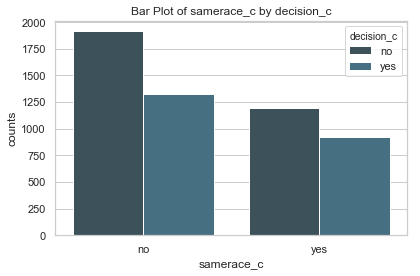

In [10]:
x = 'samerace_c'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Same Race" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Same Race" + color.END)
i

#### Decisions by Subject Preferences
Here we examine the decisions by subjects preferences, including:
* Importance Same Race
* Importance of Attractiveness
* Importance of Sincerity
* Importance of Intelligence
* Importance of Humor
* Importance of Ambition
* Importance of Shared Interests

##### Decision by Importance Same Race
Participants indicated the importance same race on a scale from 1 to 10. The median for both groups (yes and no) was the same; however, the mean value was slighly higher for those that made a no decision. The spread of opinion on importance of same race was wider for those that made a no decision. More precisely, the IQR of importance of same race was higher for the those that made a no decision. This suggested that those with high preferences for same race were more likely to make a no decision.

Descriptive Statistics of Decision by Importance Same Race


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
importance_same_race,yes,2238.0,13,0.0,1.0,3.464701,3.0,5.0,10.0,-13.044526,168.159655
importance_same_race,no,3073.0,37,0.0,1.0,4.010739,3.0,7.0,10.0,-9.003671,79.066094


Analysis of Variance of Decision by Importance Same Race


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,importance_same_race,decision_c,386.093225,43135.356973,1.0,5309.0,47.519461,6.080036e-12,0.008871


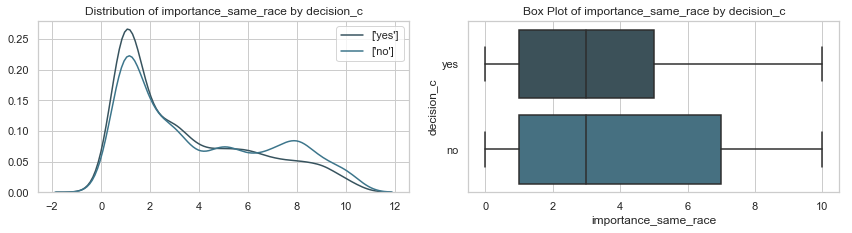

In [11]:
x = 'importance_same_race'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Importance Same Race" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Importance Same Race" + color.END)
i

##### Decision by Importance of Attractiveness
Participants indicated the importance attractiveness on a scale from 1 to 10. The median for both groups (yes and no) was the same; however, the mean value was slighly higher for those that made a yes decision. The analysis of variance indicates that that a statistically significant difference exists in the decisions by preference for attractiveness, though the percent of variance associated with this preference was about 0.2%

Descriptive Statistics of Decision by Importance of Attractiveness


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_important,yes,2238.0,13,0.0,15.0,22.179714,20.0,25.0,95.0,-13.044526,168.159655
attractive_important,no,3073.0,37,0.0,15.0,22.814374,20.0,25.0,100.0,-9.003671,79.066094


Analysis of Variance of Decision by Importance of Attractiveness


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,attractive_important,decision_c,521.58846,842598.610636,1.0,5309.0,3.286397,0.069913,0.000619


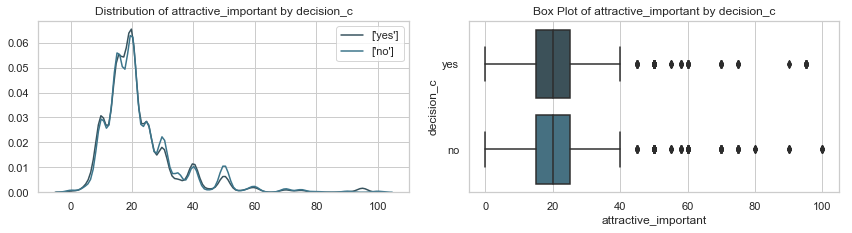

In [18]:
x = 'attractive_important'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Importance of Attractiveness" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Importance of Attractiveness" + color.END)
i

##### Decision by Importance of Sincerity
Participants indicated the importance sincerity on a scale from 1 to 10. Those that made a no decision had a slightly higher preference for sincerity than those that made chose yes.  The anova test indicates significance, but little practical significance.

Descriptive Statistics of Decision by Importance of Sincerity


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere_important,yes,2238.0,13,0.0,15.0,17.581425,18.96,20.0,60.0,-13.044526,168.159655
sincere_important,no,3073.0,37,0.0,15.0,17.155884,18.00,20.0,60.0,-9.003671,79.066094


Analysis of Variance of Decision by Importance of Sincerity


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,sincere_important,decision_c,234.493578,260139.291379,1.0,5309.0,4.785615,0.028742,0.000901


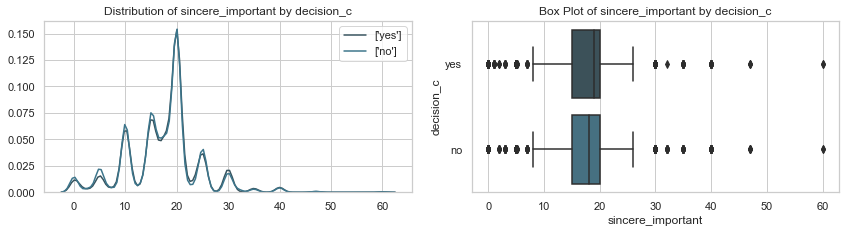

In [19]:
x = 'sincere_important'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Importance of Sincerity" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Importance of Sincerity" + color.END)
i

##### Decision by Importance of Intelligence
No statistical or practical significance in the difference between preferences for intelligence and decision.

Descriptive Statistics of Decision by Importance of Intelligence


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence_important,yes,2238.0,13,0.0,17.78,20.178901,20.0,25.00,50.0,-13.044526,168.159655
intelligence_important,no,3073.0,37,0.0,17.31,20.328116,20.0,23.08,50.0,-9.003671,79.066094


Analysis of Variance of Decision by Importance of Intelligence


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,intelligence_important,decision_c,28.831787,247702.322887,1.0,5309.0,0.617951,0.431845,0.000116


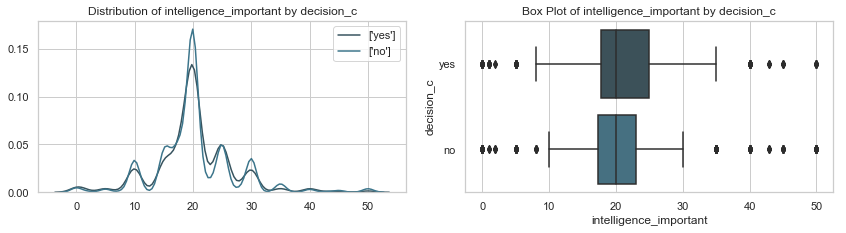

In [20]:
x = 'intelligence_important'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Importance of Intelligence" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Importance of Intelligence" + color.END)
i

##### Decision by Importance of Humor
Little statistical and no practical significance in the difference between preferences for intelligence and decision.

Descriptive Statistics of Decision by Importance of Humor


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny_important,yes,2238.0,13,0.0,15.0,17.628780,18.0,20.0,50.0,-13.044526,168.159655
funny_important,no,3069.0,41,0.0,15.0,17.480375,18.0,20.0,50.0,-8.536218,70.867018


Analysis of Variance of Decision by Importance of Humor


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,funny_important,decision_c,28.504115,198517.535239,1.0,5305.0,0.761718,0.382831,0.000144


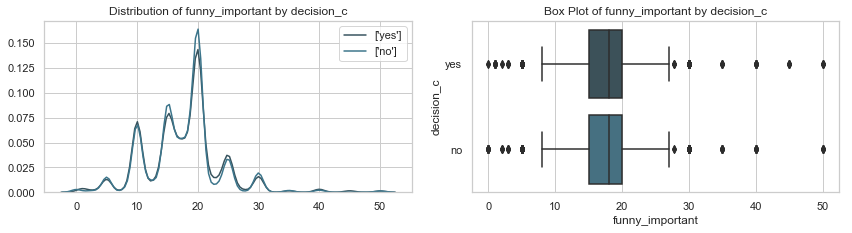

In [21]:
x = 'funny_important'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Importance of Humor" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Importance of Humor" + color.END)
i

##### Decision by Importance of Ambition
Little statistical and no practical significance in the difference between preferences for ambition and decision.

Descriptive Statistics of Decision by Importance of Ambition


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious_important,yes,2233.0,18,0.0,5.0,10.486623,10.0,15.0,53.0,-11.04824,120.063616
ambitious_important,no,3067.0,43,0.0,5.0,10.809446,10.0,15.0,53.0,-8.32704,67.339602


Analysis of Variance of Decision by Importance of Ambition


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,ambitious_important,decision_c,134.664704,199329.442998,1.0,5298.0,3.579269,0.058559,0.000675


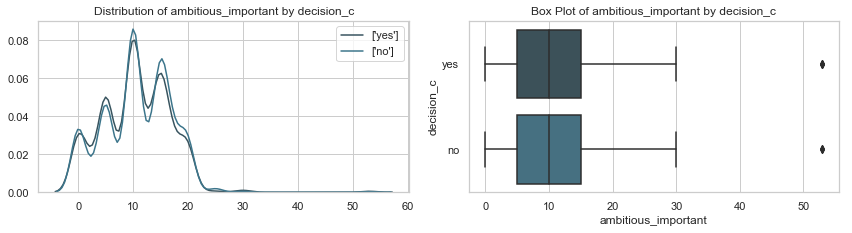

In [23]:
x = 'ambitious_important'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Importance of Ambition" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Importance of Ambition" + color.END)
i

##### Decision by Importance of Shared Interests
Little statistical and no practical significance in the difference between preferences for ambition and decision.

Descriptive Statistics of Decision by Importance of Ambition


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
shared_interests_important,yes,2232.0,19,0.0,8.0,12.125193,11.585,16.98,30.0,-10.746264,113.482197
shared_interests_important,no,3055.0,55,0.0,10.0,11.540874,10.000,15.09,30.0,-7.318706,51.563458


Analysis of Variance of Decision by Importance of Ambition


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,shared_interests_important,decision_c,440.347594,214336.798084,1.0,5285.0,10.857851,0.00099,0.00205


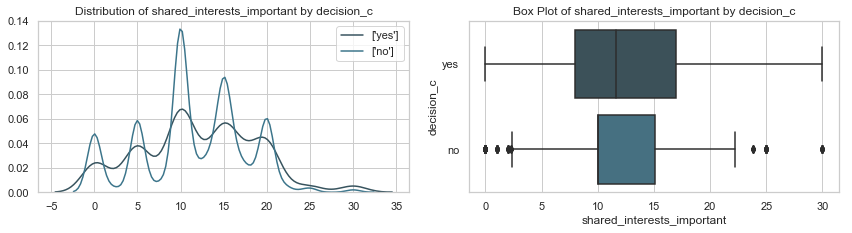

In [24]:
x = 'shared_interests_important'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Importance of Ambition" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Importance of Ambition" + color.END)
i

#### Decisions by Subject Self-Rating
Here we examine the decisions by subjects ratings of themselves along the following dimensions: 
* Attractiveness
* Sincerity
* Intelligence
* Humor
* Ambition

##### Decision by Self-Rating of Attractiveness
Overall, little practical significance in the decisions by self-rating of attractiveness. That said, there was much more variation in the self-ratings among those that made the no decision, than those who chose yes.

Descriptive Statistics of Decision by Attractive Self-Rating


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive,yes,2221.0,30,2.0,6.0,7.030167,7.0,8.0,10.0,-8.488041,70.046841
attractive,no,3071.0,39,2.0,7.0,7.135786,7.0,8.0,10.0,-8.761067,74.756289


Analysis of Variance of Decision by Attractive Self-Rating


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,attractive,decision_c,14.378024,10261.355914,1.0,5290.0,7.412251,0.006499,0.001399


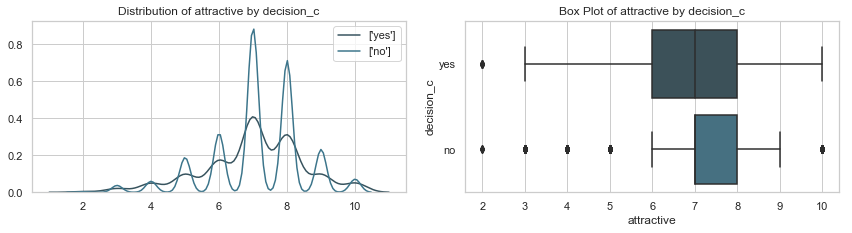

In [25]:
x = 'attractive'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Attractive Self-Rating" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Attractive Self-Rating" + color.END)
i

##### Decision by Self-Rating of Sincere
Distributions nearly identical

Descriptive Statistics of Decision by Sincerity Self-Rating


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere,yes,2221.0,30,2.0,8.0,8.261594,8.0,9.0,10.0,-8.488041,70.046841
sincere,no,3071.0,39,2.0,8.0,8.311625,8.0,9.0,10.0,-8.761067,74.756289


Analysis of Variance of Decision by Sincerity Self-Rating


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,sincere,decision_c,3.226168,10615.78895,1.0,5290.0,1.607646,0.204879,0.000304


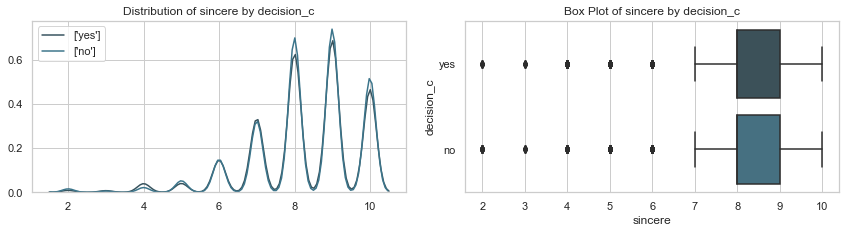

In [26]:
x = 'sincere'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Sincerity Self-Rating" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Sincerity Self-Rating" + color.END)
i

##### Decision by Self-Rating of Intelligence
Again, distributions nearly identical

Descriptive Statistics of Decision by Intelligence Self-Rating


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence,yes,2221.0,30,2.0,7.0,7.722647,8.0,9.0,10.0,-8.488041,70.046841
intelligence,no,3071.0,39,2.0,7.0,7.736242,8.0,9.0,10.0,-8.761067,74.756289


Analysis of Variance of Decision by Intelligence Self-Rating


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,intelligence,decision_c,0.238207,12419.507069,1.0,5290.0,0.101463,0.750094,0.000019


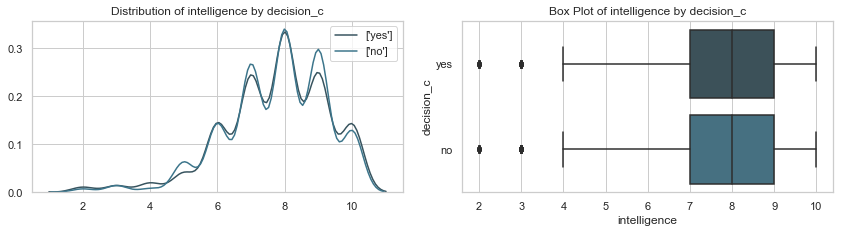

In [27]:
x = 'intelligence'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Intelligence Self-Rating" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Intelligence Self-Rating" + color.END)
i

##### Decision by Self-Rating of Humor
Again, distributions nearly identical

Descriptive Statistics of Decision by Humor Self-Rating


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny,yes,2221.0,30,3.0,8.0,8.448447,8.0,9.0,10.0,-8.488041,70.046841
funny,no,3071.0,39,3.0,8.0,8.357213,8.0,9.0,10.0,-8.761067,74.756289


Analysis of Variance of Decision by Humor Self-Rating


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,funny,decision_c,10.728082,6022.484881,1.0,5290.0,9.423279,0.002153,0.001778


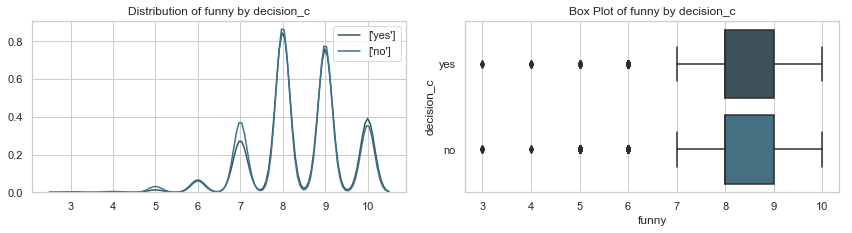

In [28]:
x = 'funny'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Humor Self-Rating" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Humor Self-Rating" + color.END)
i

##### Decision by Self-Rating of Ambition
Again, distributions nearly identical

Descriptive Statistics of Decision by Ambition Self-Rating


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious,yes,2221.0,30,2.0,7.0,7.575416,8.0,9.0,10.0,-8.488041,70.046841
ambitious,no,3071.0,39,2.0,7.0,7.570173,8.0,9.0,10.0,-8.761067,74.756289


Analysis of Variance of Decision by Ambition Self-Rating


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,ambitious,decision_c,0.035442,16795.245548,1.0,5290.0,0.011163,0.91586,0.000002


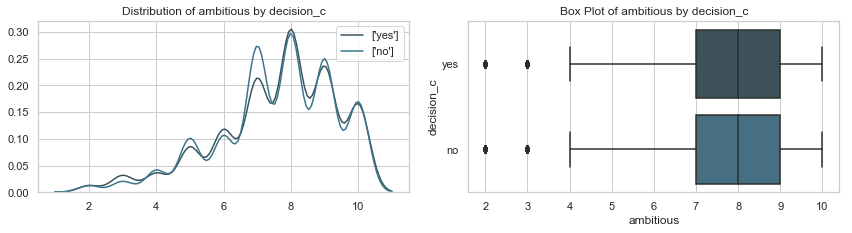

In [30]:
x = 'ambitious'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Ambition Self-Rating" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Ambition Self-Rating" + color.END)
i

#### Decisions by Rating of Partner
Here we examine the decisions by subjects ratings of their partner along the following dimensions: 
* Attractiveness
* Sincerity
* Intelligence
* Humor
* Ambition
* Shared Interests

##### Decision by Subject Rating of Partner Attractiveness
Significant difference, as expected, in the decisions based upon the attractiveness of partner.  Accounted for 24% of the total variance. 

Descriptive Statistics of Decision by Attractiveness of Partner


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_partner,yes,2244.0,7,1.0,6.0,7.300089,7.0,8.0,10.0,-17.848657,316.574548
attractive_partner,no,2980.0,130,0.0,4.0,5.359564,5.0,7.0,10.0,-4.578941,18.966701


Analysis of Variance of Decision by Attractiveness of Partner


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,attractive_partner,decision_c,4820.305876,14947.057415,1.0,5222.0,1684.053027,2.465733e-319,0.243852


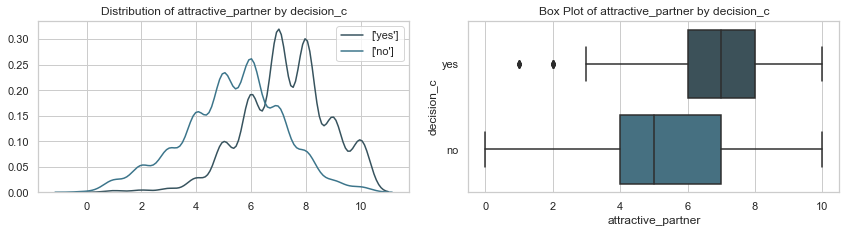

In [31]:
x = 'attractive_partner'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Attractiveness of Partner" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Attractiveness of Partner" + color.END)
i

##### Decision by Subject Rating of Partner Sincerity
Significant statistical difference in decision for those found to be sincere, though this accounted for less than 5% of the variance observed.

Descriptive Statistics of Decision by Sincerity of Partner


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere_partner,yes,2227.0,24,0.0,7.0,7.600584,8.0,9.0,10.0,-9.529032,88.802443
sincere_partner,no,2953.0,157,0.0,6.0,6.870979,7.0,8.0,10.0,-4.106347,14.862083


Analysis of Variance of Decision by Sincerity of Partner


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,sincere_partner,decision_c,675.817762,14701.312113,1.0,5178.0,238.032112,1.535985e-52,0.04395


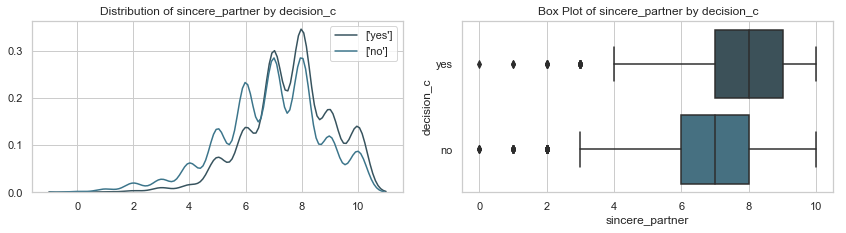

In [32]:
x = 'sincere_partner'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Sincerity of Partner" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Sincerity of Partner" + color.END)
i

##### Decision by Subject Rating of Partner Inteligence
Again, statistically significant number of yes decisions for those found to be intelligent.

Descriptive Statistics of Decision by Intelligence of Partner


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence_partner,yes,2226.0,25,3.0,7.0,7.756289,8.0,9.0,10.0,-9.330125,85.051231
intelligence_partner,no,2942.0,168,0.0,6.0,7.073759,7.0,8.0,10.0,-3.945758,13.569009


Analysis of Variance of Decision by Intelligence of Partner


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,intelligence_partner,decision_c,590.321721,11366.531171,1.0,5166.0,268.29663,7.935489e-59,0.049371


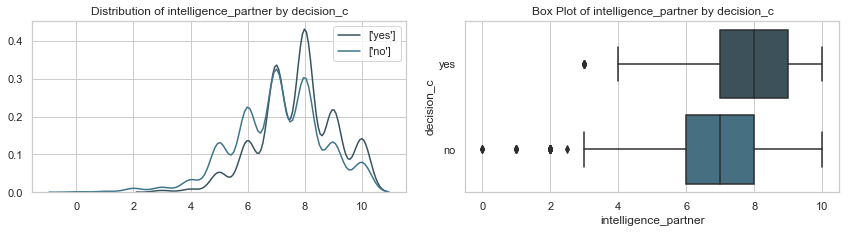

In [33]:
x = 'intelligence_partner'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Intelligence of Partner" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Intelligence of Partner" + color.END)
i

##### Decision by Subject Rating of Partner Humor
Sense of humor a significant indicator of the a decision to pursue a second date. Accounted for 18% of total variance.

Descriptive Statistics of Decision by Humor of Partner


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny_partner,yes,2204.0,47,0.0,6.0,7.375454,7.0,8.0,10.0,-6.701861,42.914942
funny_partner,no,2924.0,186,0.0,5.0,5.674248,6.0,7.0,10.0,-3.712687,11.784042


Analysis of Variance of Decision by Humor of Partner


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,funny_partner,decision_c,3637.096399,15809.532891,1.0,5126.0,1179.273054,8.554035e-233,0.18703


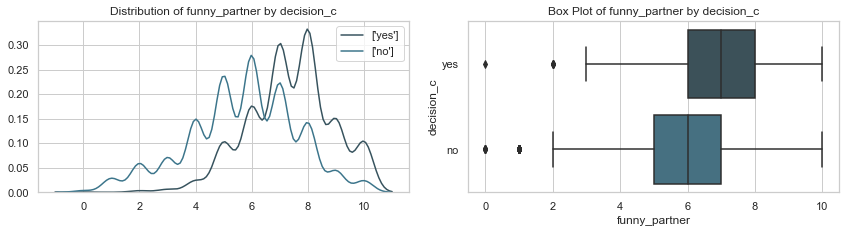

In [34]:
x = 'funny_partner'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Humor of Partner" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Humor of Partner" + color.END)
i

##### Decision by Subject Rating of Partner Ambition
Statistically significant, but not practically significant.

Descriptive Statistics of Decision by Ambition of Partner


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious_partner,yes,2096.0,155,0.0,6.0,7.185115,7.0,8.0,10.0,-3.405368,9.596531
ambitious_partner,no,2802.0,308,0.0,5.0,6.497145,7.0,8.0,10.0,-2.684646,5.207324


Analysis of Variance of Decision by Ambition of Partner


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,ambitious_partner,decision_c,567.517338,14942.652732,1.0,4896.0,185.948569,1.388966e-41,0.03659


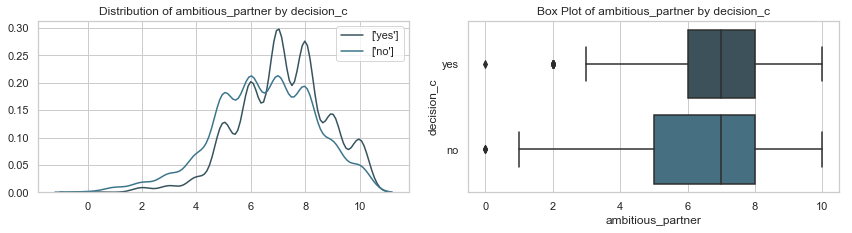

In [36]:
x = 'ambitious_partner'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Ambition of Partner" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Ambition of Partner" + color.END)
i

##### Decision by Subject Rating of Partner Shared-Interests
Both statistically and practically signficant predictor of decision. Accounted for 17% of variance.

Descriptive Statistics of Decision by Partner Shared Interests


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
shared_interests_partner,yes,2015.0,236,0.0,5.0,6.481886,7.0,8.0,10.0,-2.579779,4.655257
shared_interests_partner,no,2655.0,455,0.0,3.0,4.711299,5.0,6.0,10.0,-2.001634,2.006540


Analysis of Variance of Decision by Partner Shared Interests


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,shared_interests_partner,decision_c,3591.343565,17981.549851,1.0,4668.0,932.310724,7.594751e-187,0.166475


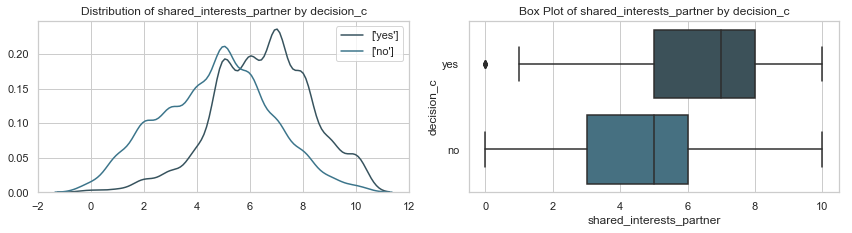

In [37]:
x = 'shared_interests_partner'
y = 'decision_c'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Descriptive Statistics of Decision by Partner Shared Interests" + color.END)
d
print(color.BOLD + "Analysis of Variance of Decision by Partner Shared Interests" + color.END)
i